### Machine Learning and Prediction Model
##### (for next 10 days)

In [1]:
# Importing computation libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline

# Disable Warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
confirmed_cases = pd.read_csv('time_series_covid19_confirmed_global.csv')
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,852,852,852,852,852,853,853,853,853,854
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,91,92,96,113,118,130,138,140,142,148


In [3]:
deaths_reported = pd.read_csv('time_series_covid19_deaths_global.csv')
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,357,369,384,405,426,446,451,471,478,491
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,34,34,34,34,35,36,36,36,36,37
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,707,715,724,732,741,751,760,767,777,788
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,52
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,4,4,4,5,5,6,6,6,6


In [4]:
recovered_cases = pd.read_csv('time_series_covid19_recovered_global.csv')
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1875,2171,2651,3013,3326,3928,4201,4725,5164,5508
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,938,945,960,980,1001,1034,1039,1044,1055,1064
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,6717,6799,6951,7074,7255,7322,7420,7606,7735,7842
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,744,751,757,759,780,781,781,781,789,789
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,38,38,40,41,42,61,61,64,64


In [5]:
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/7/20', '6/8/20', '6/9/20', '6/10/20', '6/11/20', '6/12/20',
       '6/13/20', '6/14/20', '6/15/20', '6/16/20'],
      dtype='object', length=151)

In [6]:
# Extracting only the dates columns hosting information on confirmed cases, deaths and recovered cases
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20
0,0,0,0,0,0,0,0,0,0,0,...,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310
1,0,0,0,0,0,0,0,0,0,0,...,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672
2,0,0,0,0,0,0,0,0,0,0,...,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147
3,0,0,0,0,0,0,0,0,0,0,...,852,852,852,852,852,853,853,853,853,854
4,0,0,0,0,0,0,0,0,0,0,...,91,92,96,113,118,130,138,140,142,148


In [7]:
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]
deaths.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20
0,0,0,0,0,0,0,0,0,0,0,...,357,369,384,405,426,446,451,471,478,491
1,0,0,0,0,0,0,0,0,0,0,...,34,34,34,34,35,36,36,36,36,37
2,0,0,0,0,0,0,0,0,0,0,...,707,715,724,732,741,751,760,767,777,788
3,0,0,0,0,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,52
4,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,5,5,6,6,6,6


In [8]:
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]
recoveries.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20
0,0,0,0,0,0,0,0,0,0,0,...,1875,2171,2651,3013,3326,3928,4201,4725,5164,5508
1,0,0,0,0,0,0,0,0,0,0,...,938,945,960,980,1001,1034,1039,1044,1055,1064
2,0,0,0,0,0,0,0,0,0,0,...,6717,6799,6951,7074,7255,7322,7420,7606,7735,7842
3,0,0,0,0,0,0,0,0,0,0,...,744,751,757,759,780,781,781,781,789,789
4,0,0,0,0,0,0,0,0,0,0,...,24,38,38,40,41,42,61,61,64,64


In [9]:
# Calculating, Global Mortality rate = Total Deaths/ Total Confirmed cases
dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []
total_recovered = []

for date in dates:
    confirmed_sum = confirmed[date].sum()
    death_sum = deaths[date].sum()
    recovered_sum = recoveries[date].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [25]:
# Converting all the dates & cases in the form of numpy array 
days_since_1_22 = np.array([day for day in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)

In [27]:
# Forecasting for next 10 days
days_in_future = 10
future_forecast = np.array([day for day in range(len(dates) + days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-10]

In [31]:
# Converting int to datetime val for visualization
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [33]:
# Latest data of 16th June 2020
latest_confirmed = confirmed_cases[dates[-1]]
latest_deaths = deaths_reported[dates[-1]]
latest_recoveries = recovered_cases[dates[-1]]

In [37]:
# listing unique countries 
unique_countries = list(confirmed_cases['Country/Region'].unique())
len(unique_countries)

188

In [38]:
# Calculating total confirmed cases for each country
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_countries.remove(i)

unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse = True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

In [39]:
# Cumulative cases per country/region
print('Confirmed cases by Country/Region')
for i in range(len(unique_countries)):
    print(f"{unique_countries[i]}: {country_confirmed_cases[i]} cases")

Confirmed cases by Country/Region
US: 2137731 cases
Brazil: 923189 cases
Russia: 544725 cases
India: 354065 cases
United Kingdom: 299600 cases
Spain: 244328 cases
Italy: 237500 cases
Peru: 237156 cases
France: 194347 cases
Iran: 192439 cases
Germany: 188252 cases
Chile: 184449 cases
Turkey: 181298 cases
Mexico: 154863 cases
Pakistan: 154760 cases
Saudi Arabia: 136315 cases
Canada: 101087 cases
Bangladesh: 94481 cases
China: 84422 cases
Qatar: 82077 cases
South Africa: 76334 cases
Belgium: 60155 cases
Belarus: 55369 cases
Sweden: 53323 cases
Colombia: 53211 cases
Netherlands: 49295 cases
Ecuador: 47943 cases
Egypt: 47856 cases
United Arab Emirates: 42982 cases
Singapore: 40969 cases
Indonesia: 40400 cases
Portugal: 37336 cases
Kuwait: 36958 cases
Argentina: 34159 cases
Ukraine: 33209 cases
Switzerland: 31154 cases
Poland: 30195 cases
Philippines: 26781 cases
Afghanistan: 26310 cases
Ireland: 25334 cases
Oman: 25269 cases
Dominican Republic: 23686 cases
Iraq: 22700 cases
Romania: 22415 c

In [41]:
# Listing all unique provinces
unique_provinces = list(confirmed_cases['Province/State'].unique())

In [44]:
# Finding confirmed cases per province
province_confirmed_cases = []
no_cases = []
for i in unique_provinces:
    cases = latest_confirmed[confirmed_cases['Province/State']==i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    try:
        unique_provinces.remove()
    except TypeError:
        pass

In [47]:
# Number of cases per province 
for i in range(len(unique_provinces)):
    try:
        print(f"{unique_provinces[i]}: {province_confirmed_cases[i]} cases")
    except IndexError:
        pass

nan: 108 cases
Australian Capital Territory: 3135 cases
New South Wales: 29 cases
Northern Territory: 1066 cases
Queensland: 440 cases
South Australia: 228 cases
Tasmania: 1762 cases
Victoria: 602 cases
Western Australia: 7482 cases
Alberta: 2756 cases
British Columbia: 13 cases
Grand Princess: 304 cases
Manitoba: 163 cases
New Brunswick: 261 cases
Newfoundland and Labrador: 1061 cases
Nova Scotia: 34174 cases
Ontario: 27 cases
Prince Edward Island: 54146 cases
Quebec: 684 cases
Saskatchewan: 991 cases
Anhui: 731 cases
Beijing: 582 cases
Chongqing: 362 cases
Fujian: 149 cases
Gansu: 1628 cases
Guangdong: 254 cases
Guangxi: 147 cases
Guizhou: 171 cases
Hainan: 336 cases
Hebei: 947 cases
Heilongjiang: 1276 cases
Henan: 1112 cases
Hong Kong: 68135 cases
Hubei: 1019 cases
Hunan: 238 cases
Inner Mongolia: 653 cases
Jiangsu: 932 cases
Jiangxi: 155 cases
Jilin: 152 cases
Liaoning: 45 cases
Macau: 75 cases
Ningxia: 18 cases
Qinghai: 313 cases
Shaanxi: 792 cases
Shandong: 695 cases
Shanghai: 19

In [48]:
# Handelling missing values
nan_indices = []

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

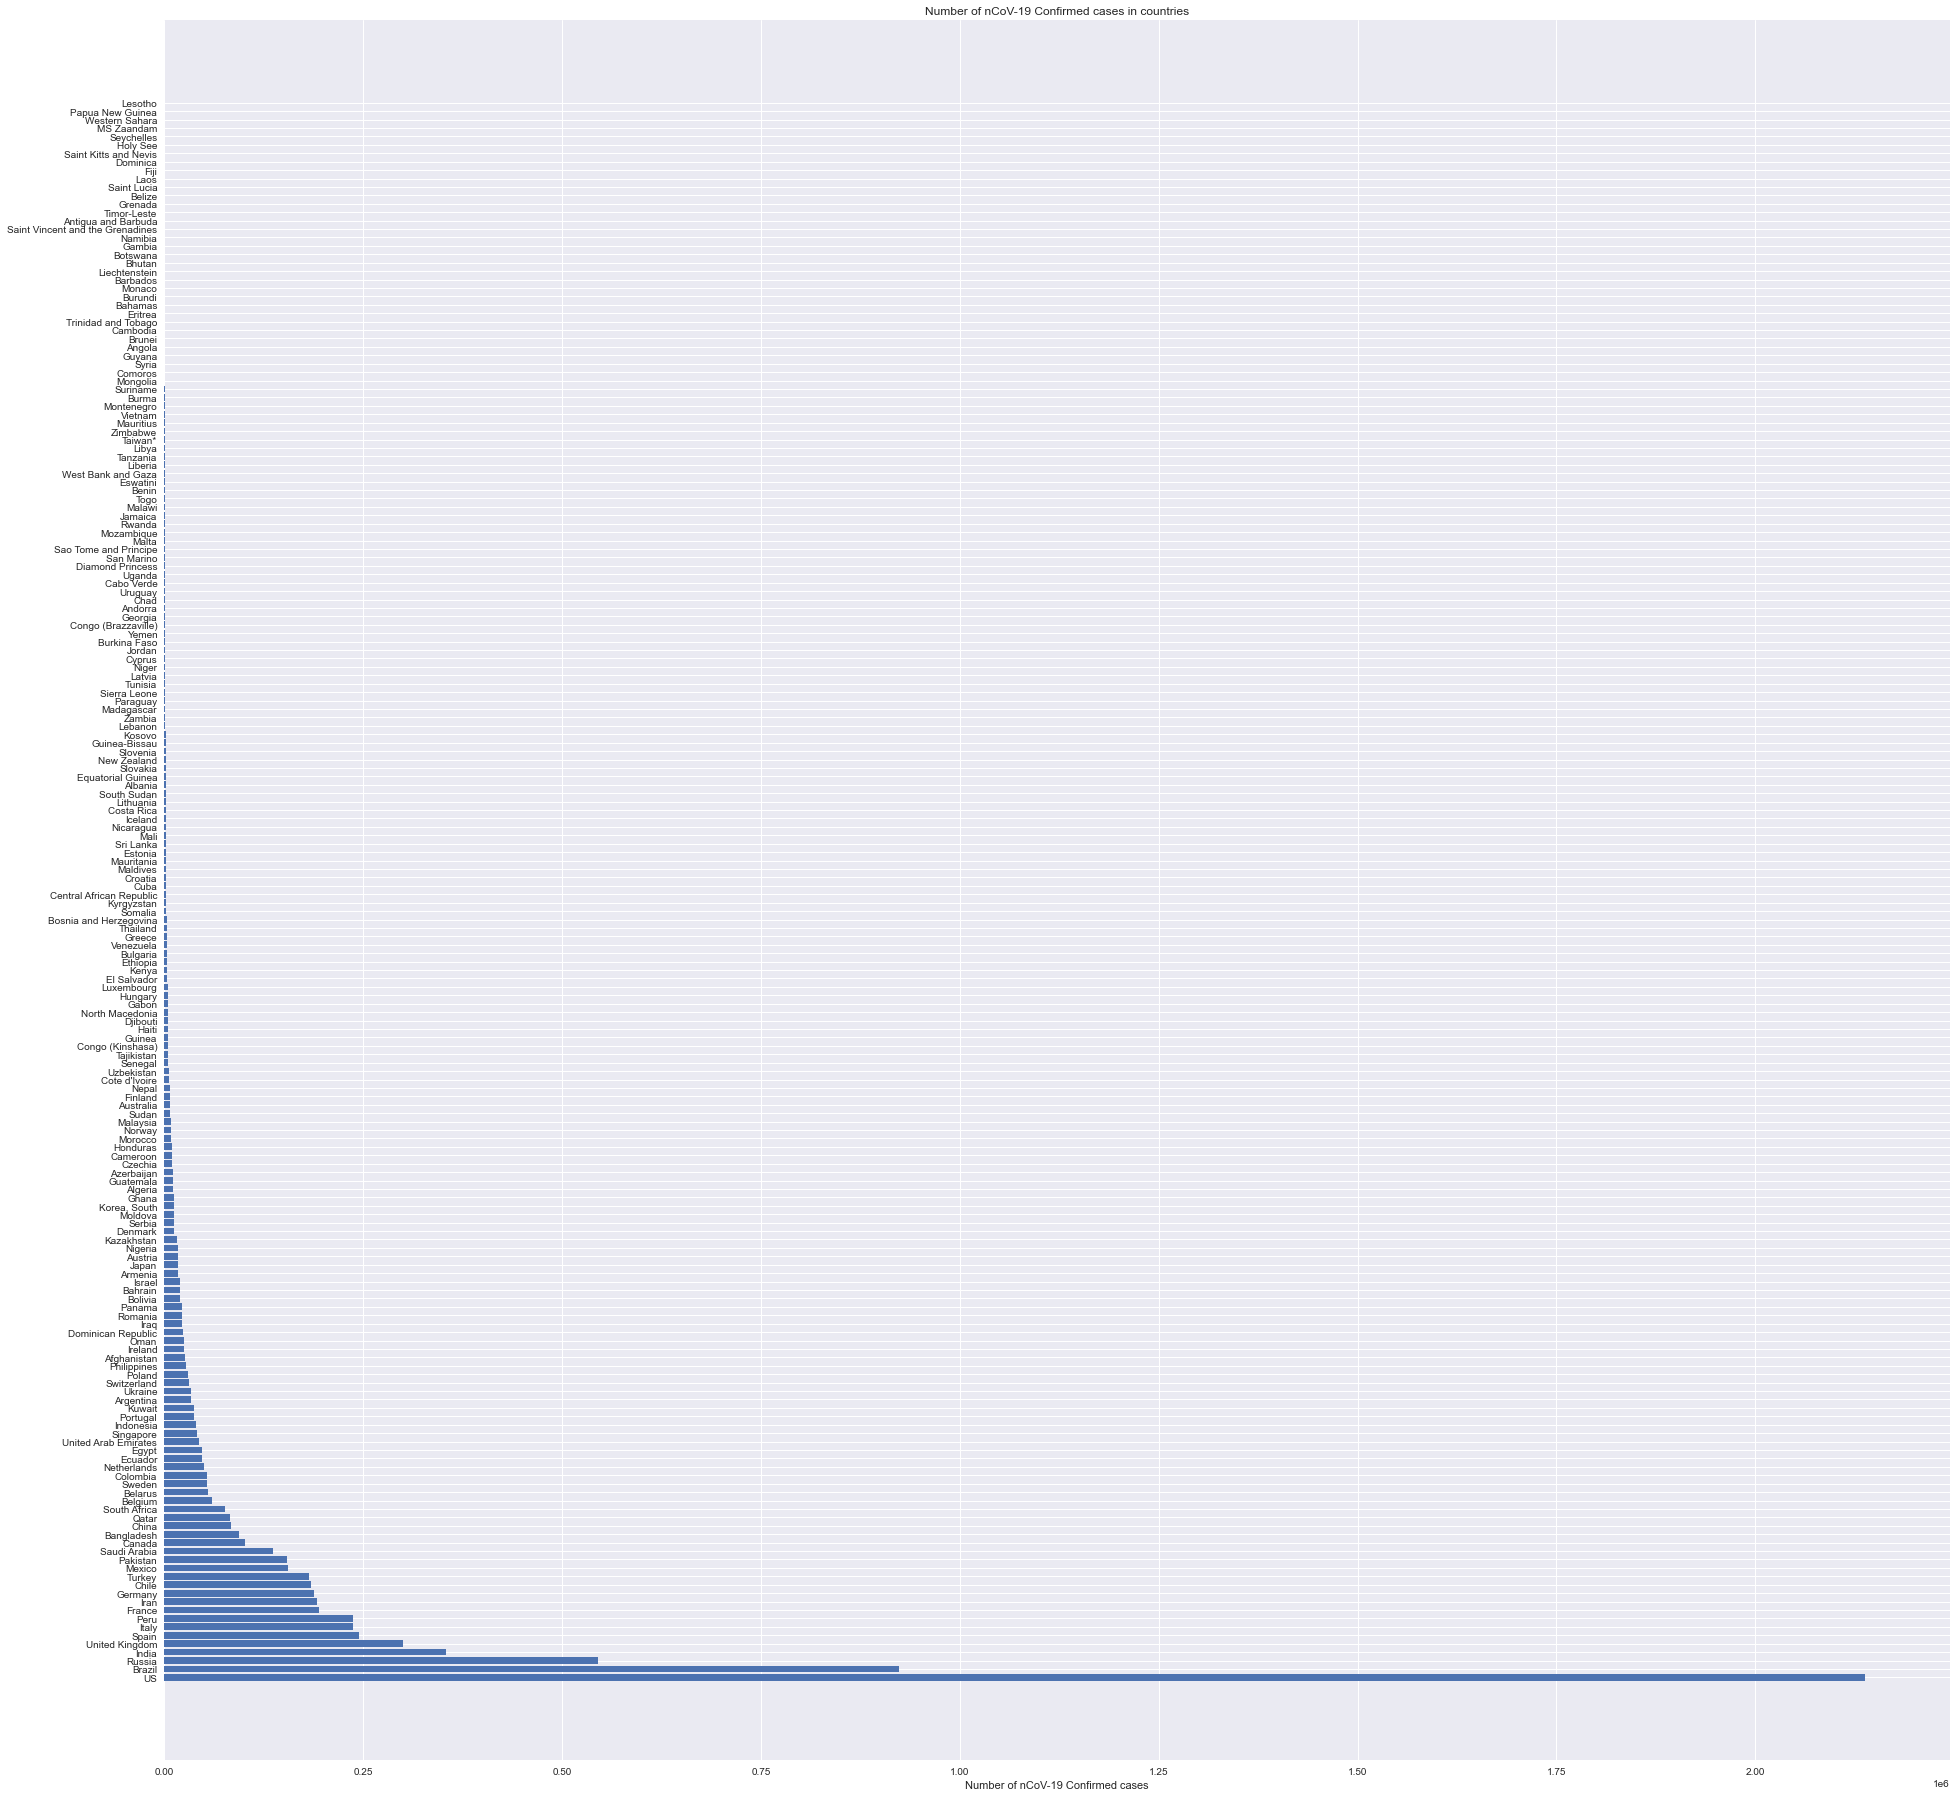

In [51]:
# Bar graph to quantify total confirmed cases across different countries

plt.figure(figsize=(32,32))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('Number of nCoV-19 Confirmed cases in countries')
plt.xlabel('Number of nCoV-19 Confirmed cases')
# plt.savefig('Horizontal Bar graph showing nCoV-19 confirmed cases.png')
plt.show()

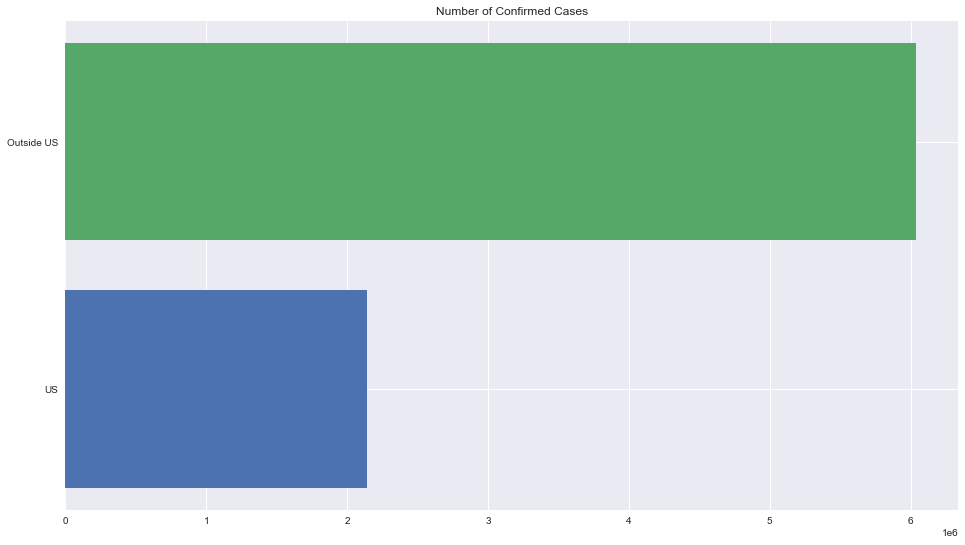

In [53]:
# Graph showing total cases between US and outside US
US_confirmed = latest_confirmed[confirmed_cases['Country/Region']=='US'].sum()
outside_mainland_US_confirmed = np.sum(country_confirmed_cases) - US_confirmed
plt.figure(figsize=(16,9))
plt.barh('US', US_confirmed)
plt.barh('Outside US', outside_mainland_US_confirmed)
plt.title('Number of Confirmed Cases')
# plt.savefig('US vs Others.png')
plt.show()

In [55]:
print(f"Confirmed cases outside US: {outside_mainland_US_confirmed}")
print(f"Confirmed cases in US: {US_confirmed}")
print(f"Total cass: {outside_mainland_US_confirmed + US_confirmed}")

Confirmed cases outside US: 6036209
Confirmed cases in US: 2137731
Total cass: 8173940


In [56]:
# Top 10 countrise with the most confirmed cases while other's grouped as 'Others'
visual_unique_countries = []
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])

for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

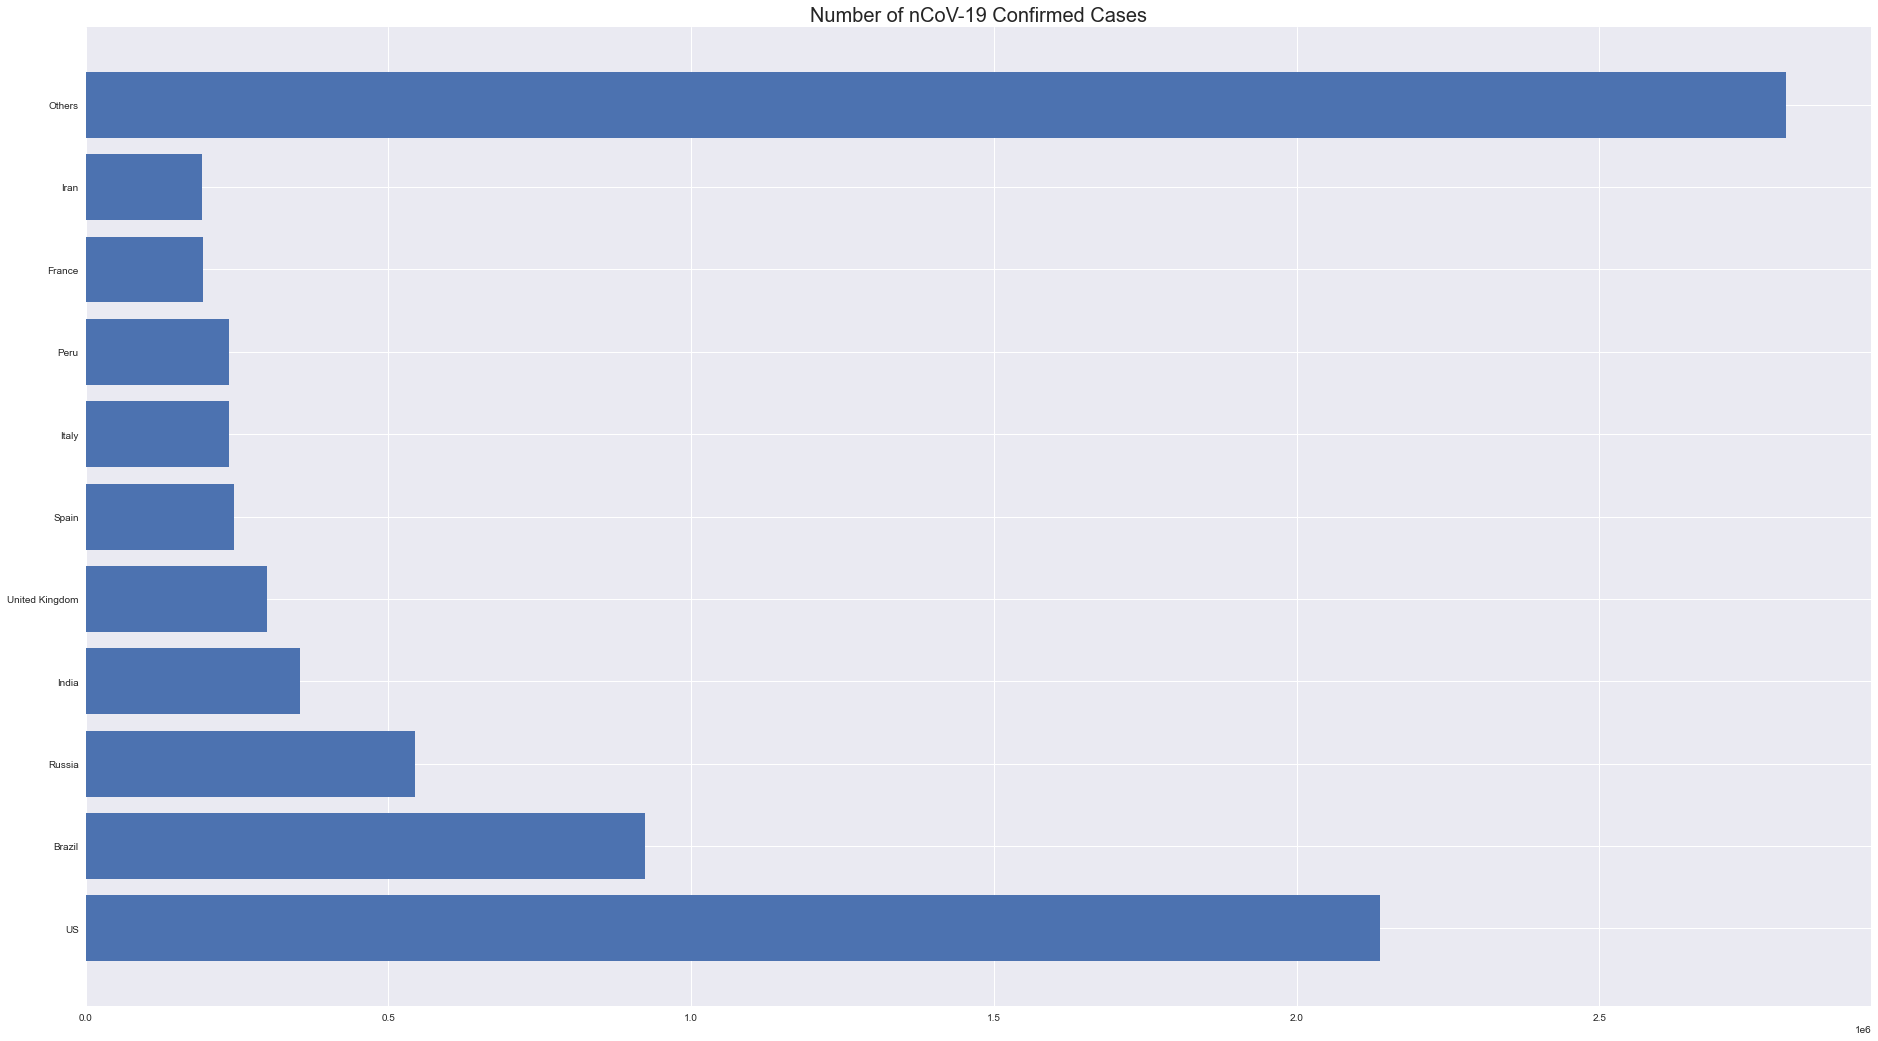

In [57]:
# Ploting the 10 countries and Other's over a H-bar graph
plt.figure(figsize=(32,18))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('Number of nCoV-19 Confirmed Cases', size = 20)
plt.savefig('Top10 and Others.png')
plt.show()

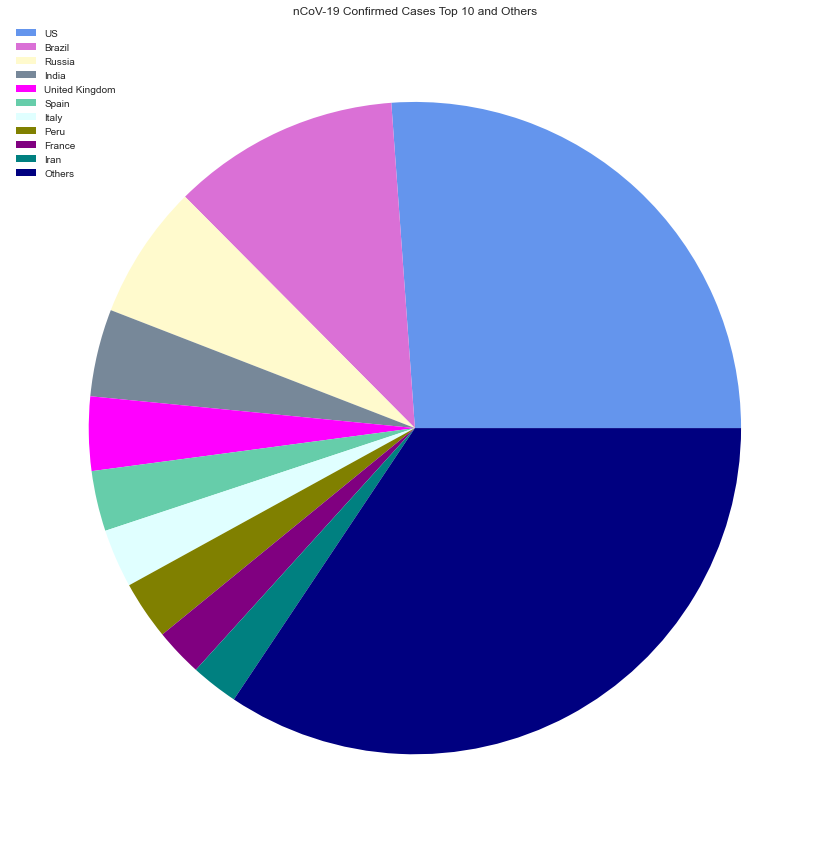

In [227]:
# Pie chart to see the contribution
c = random.choices(list(mcolors.CSS4_COLORS.values()), k=len(unique_countries))
plt.figure(figsize=(15,15))
plt.title('nCoV-19 Confirmed Cases Top 10 and Others')
plt.pie(visual_confirmed_cases, colors=c)
plt.legend(visual_unique_countries, loc='best')
# plt.savefig('PieChart nCoV-19 Confirmed Cases Top 10 and Others.png')
plt.show()

In [97]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.15, shuffle=False)

In [105]:
# Building SMV model
kernel = ['poly', 'sigmoid', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel':kernel,'C':c, 'gamma':gamma, 'epsilon':epsilon, 'shrinking':shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=1, n_iter=40, verbose=4)
svm_search.fit(X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] shrinking=False, kernel=poly, gamma=1, epsilon=0.01, C=10 .......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  shrinking=False, kernel=poly, gamma=1, epsilon=0.01, C=10, score=(train=-309460601372.962, test=-107659372455.373), total= 3.3min
[CV] shrinking=False, kernel=poly, gamma=1, epsilon=0.01, C=10 .......


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.3min remaining:    0.0s


[CV]  shrinking=False, kernel=poly, gamma=1, epsilon=0.01, C=10, score=(train=-178745250731.553, test=-102368931335.773), total= 9.0min
[CV] shrinking=False, kernel=poly, gamma=1, epsilon=0.01, C=10 .......


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 12.2min remaining:    0.0s


[CV]  shrinking=False, kernel=poly, gamma=1, epsilon=0.01, C=10, score=(train=-23552334514.411, test=-351099667868.060), total=  41.1s
[CV] shrinking=True, kernel=poly, gamma=1, epsilon=0.01, C=10 ........


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 12.9min remaining:    0.0s


[CV]  shrinking=True, kernel=poly, gamma=1, epsilon=0.01, C=10, score=(train=-429521582308.389, test=-14558056641.077), total=  31.2s
[CV] shrinking=True, kernel=poly, gamma=1, epsilon=0.01, C=10 ........
[CV]  shrinking=True, kernel=poly, gamma=1, epsilon=0.01, C=10, score=(train=-835593750495.282, test=-218712101688.953), total=  58.9s
[CV] shrinking=True, kernel=poly, gamma=1, epsilon=0.01, C=10 ........
[CV]  shrinking=True, kernel=poly, gamma=1, epsilon=0.01, C=10, score=(train=-23552334525.653, test=-351099667435.002), total=  17.7s
[CV] shrinking=False, kernel=rbf, gamma=0.01, epsilon=0.01, C=0.1 ....
[CV]  shrinking=False, kernel=rbf, gamma=0.01, epsilon=0.01, C=0.1, score=(train=-2915674108772.748, test=-3591359161357.244), total=   0.0s
[CV] shrinking=False, kernel=rbf, gamma=0.01, epsilon=0.01, C=0.1 ....
[CV]  shrinking=False, kernel=rbf, gamma=0.01, epsilon=0.01, C=0.1, score=(train=-6683015944460.842, test=-650167467352.347), total=   0.0s
[CV] shrinking=False, kernel=rbf

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 18.4min finished


RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=40, n_jobs=1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=4)

In [107]:
# Finding out the best parameters for the model
svm_search.best_params_

{'shrinking': True, 'kernel': 'poly', 'gamma': 1, 'epsilon': 0.1, 'C': 1}

In [ ]:
svm_confirmed = svm_search.best_estimator_
svm_pred = svm_confirmed.predict(future_forecast)

In [110]:
svm_confirmed

SVR(C=1, gamma=1, kernel='poly')

In [111]:
svm_pred

array([5.55099800e+02, 5.58308533e+02, 5.80769662e+02, 6.41735584e+02,
       7.60458694e+02, 9.56191391e+02, 1.24818607e+03, 1.65569513e+03,
       2.19797096e+03, 2.89426596e+03, 3.76383253e+03, 4.82592306e+03,
       6.09978995e+03, 7.60468560e+03, 9.35986241e+03, 1.13845728e+04,
       1.36980691e+04, 1.63196037e+04, 1.92684291e+04, 2.25637976e+04,
       2.62249616e+04, 3.02711736e+04, 3.47216859e+04, 3.95957509e+04,
       4.49126210e+04, 5.06915487e+04, 5.69517862e+04, 6.37125861e+04,
       7.09932007e+04, 7.88128823e+04, 8.71908835e+04, 9.61464565e+04,
       1.05698854e+05, 1.15867328e+05, 1.26671131e+05, 1.38129516e+05,
       1.50261734e+05, 1.63087039e+05, 1.76624682e+05, 1.90893917e+05,
       2.05913994e+05, 2.21704168e+05, 2.38283690e+05, 2.55671813e+05,
       2.73887789e+05, 2.92950870e+05, 3.12880309e+05, 3.33695358e+05,
       3.55415270e+05, 3.78059297e+05, 4.01646691e+05, 4.26196705e+05,
       4.51728591e+05, 4.78261602e+05, 5.05814990e+05, 5.34408008e+05,
      

Mean Absulute Error:  1163973.2434819655
Mean Squared Error:  1483951323402.676


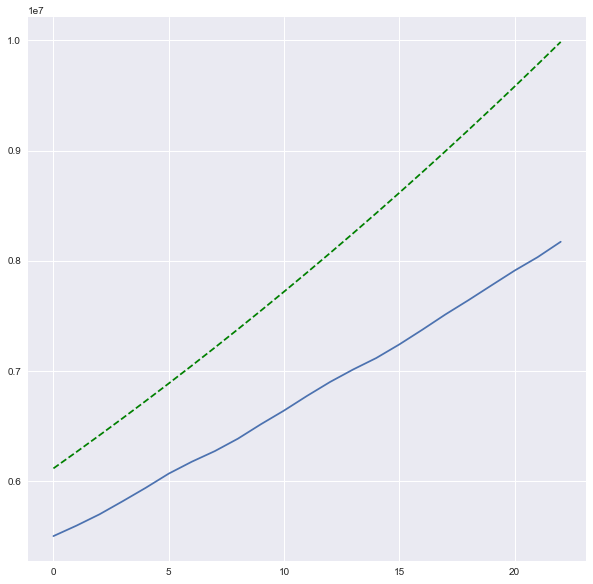

In [143]:
# chk against the testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.figure(figsize=(10,10))
plt.plot(svm_test_pred, linestyle='dashed', color='green')
plt.plot(y_test_confirmed)
plt.savefig('Predicted vs Confirmed.png')
print('Mean Absulute Error: ', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('Mean Squared Error: ', mean_squared_error(svm_test_pred, y_test_confirmed))

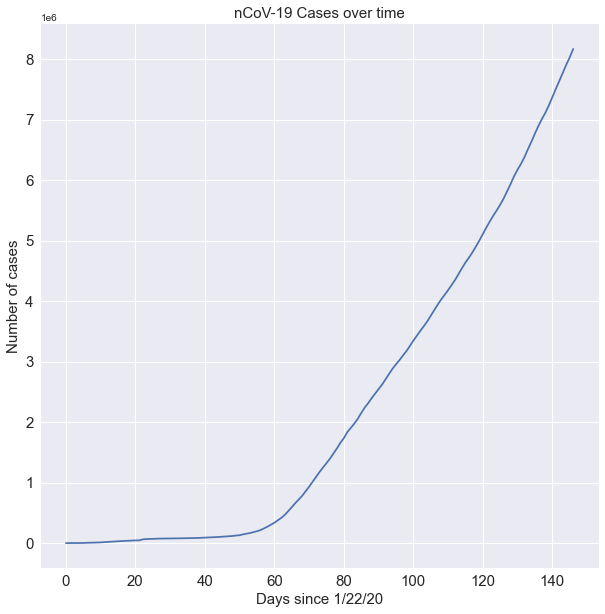

In [126]:
# Total Number of coronavirus cases over time 
plt.figure(figsize=(10,10))
plt.plot(adjusted_dates, world_cases)
plt.title('nCoV-19 Cases over time',size=15)
plt.xlabel('Days since 1/22/20', size=15)
plt.ylabel('Number of cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.savefig('nCoV_19 cases over time.png')
plt.show()

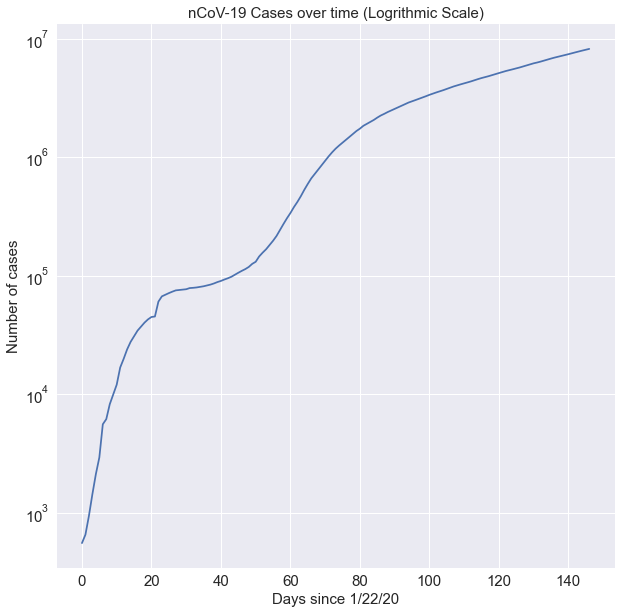

In [136]:
# Total Number of coronavirus cases over time 
plt.figure(figsize=(10,10))
plt.plot(adjusted_dates, world_cases)
plt.title('nCoV-19 Cases over time (Logrithmic Scale)',size=15)
plt.xlabel('Days since 1/22/20', size=15)
plt.ylabel('Number of cases',size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.yscale("log")
plt.savefig('Logrithmic nCoV_19 cases over time.png')
plt.show()

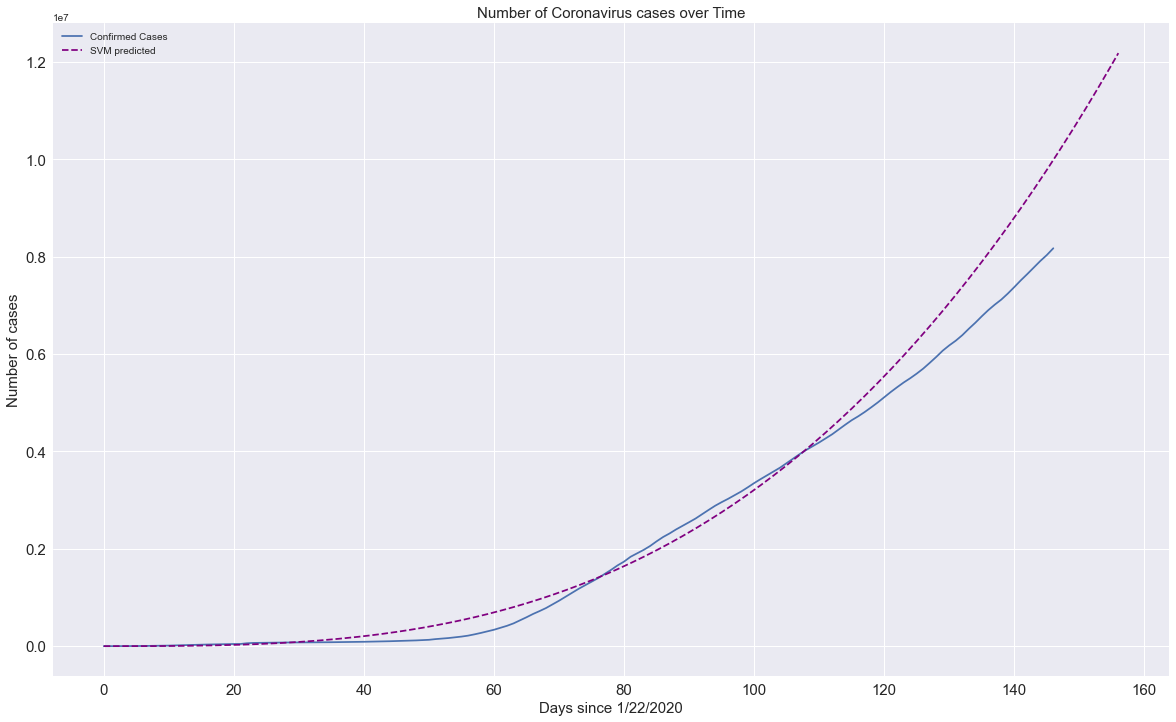

In [138]:
# Confirmed vs Predicted cases
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, svm_pred, linestyle='dashed', color='purple')
plt.title('Number of Coronavirus cases over Time', size=15)
plt.xlabel('Days since 1/22/2020', size=15)
plt.ylabel('Number of cases', size = 15)
plt.legend(['Confirmed Cases', 'SVM predicted'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [144]:
# Forecasting for next 10 days via SVM model
print('SVM model forecasting ')
set(zip(future_forecast_dates[-10:], svm_pred[-10:]))


SVM model forecasting 


{('06/17/2020', 10193168.4122999),
 ('06/18/2020', 10402599.18964365),
 ('06/19/2020', 10614879.3185499),
 ('06/20/2020', 10830028.0607374),
 ('06/21/2020', 11048064.6544874),
 ('06/22/2020', 11269008.3654249),
 ('06/23/2020', 11492878.4435499),
 ('06/24/2020', 11719694.1310499),
 ('06/25/2020', 11949474.6935499),
 ('06/26/2020', 12182239.3732374)}

In [171]:
# Prediction using Linear Regression

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forecast)
print("Mean Absolute Error: ", mean_absolute_error(test_linear_pred, y_test_confirmed))
print("Mean Squared Error: ", mean_squared_error(test_linear_pred, y_test_confirmed))

Mean Absolute Error:  2172307.3865029244
Mean Squared Error:  4990138414009.445


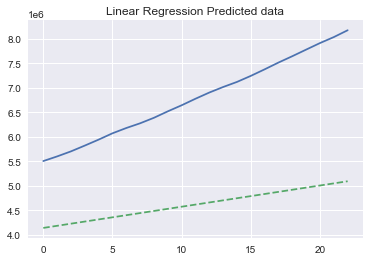

In [176]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred, linestyle='dashed')
plt.title("Linear Regression Predicted data")
plt.savefig('Linear Regression Predicted vs Confirmed data.png')

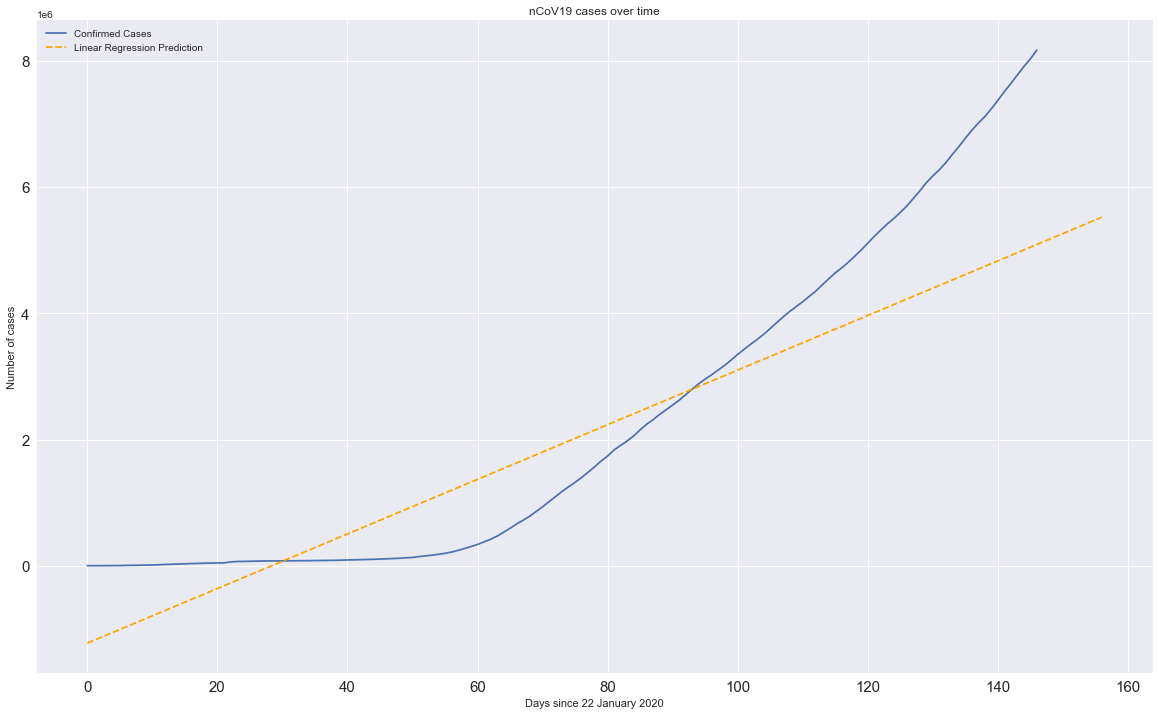

In [183]:
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, linear_pred, linestyle='dashed', color='orange')
plt.title('nCoV19 cases over time')
plt.xlabel('Days since 22 January 2020')
plt.ylabel('Number of cases')
plt.legend(['Confirmed Cases', 'Linear Regression Prediction'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.savefig('Linear Regression vs Confirmed.png')
plt.show()

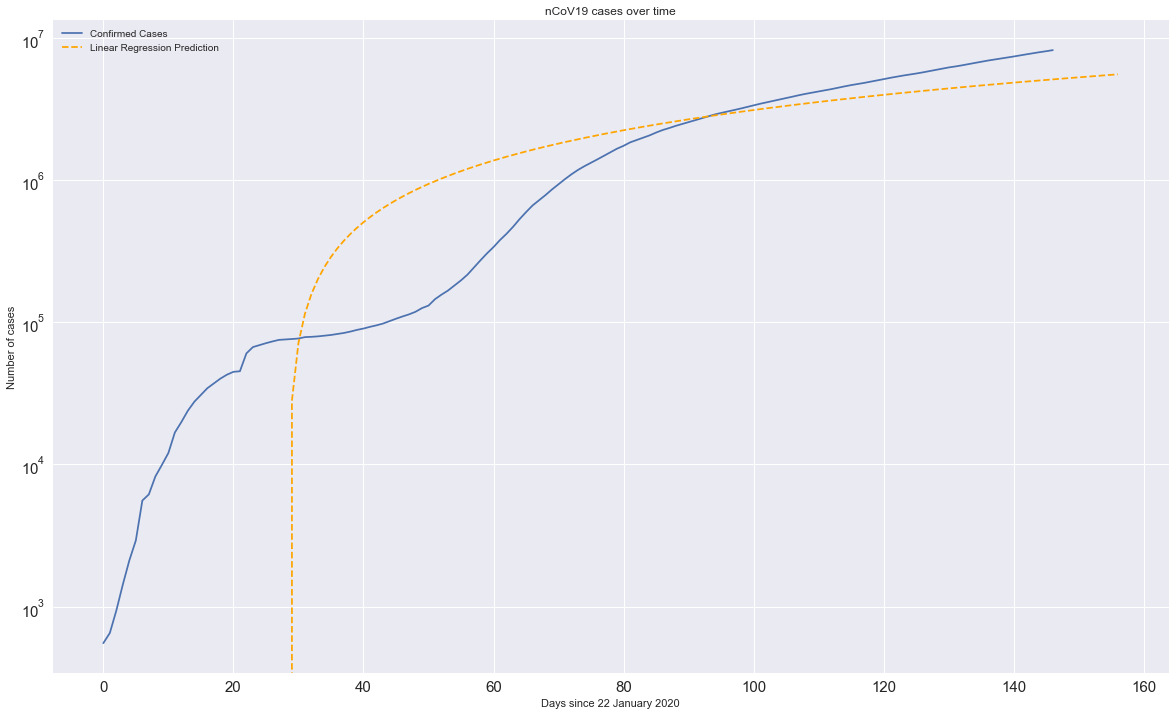

In [185]:
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, linear_pred, linestyle='dashed', color='orange')
plt.title('nCoV19 cases over time')
plt.xlabel('Days since 22 January 2020')
plt.ylabel('Number of cases')
plt.legend(['Confirmed Cases', 'Linear Regression Prediction'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.yscale("log")
plt.savefig('Linear Regression vs Confirmed (Logrithmic Scale).png')
plt.show()

In [186]:
# Linear Regression prediction for next 10 days
print('Linear Regression future predicitons: ')
print(linear_pred[-10:])

Linear Regression future predicitons: 
[[5135541.6300236 ]
 [5178825.10966168]
 [5222108.58929976]
 [5265392.06893785]
 [5308675.54857593]
 [5351959.02821401]
 [5395242.50785209]
 [5438525.98749017]
 [5481809.46712825]
 [5525092.94676633]]


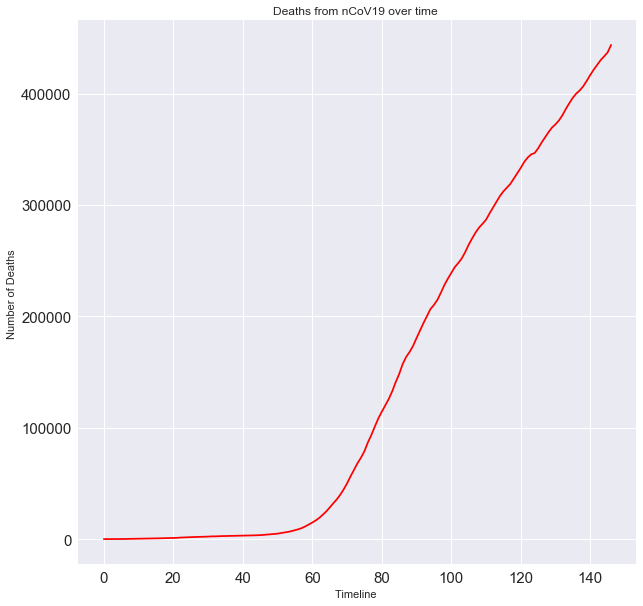

In [192]:
# Total Deaths 
plt.figure(figsize=(10,10))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('Deaths from nCoV19 over time ')
plt.xlabel('Timeline ')
plt.ylabel('Number of Deaths ')
plt.xticks(size=15)
plt.yticks(size=15)
plt.savefig('Deaths from nCoV19.png')
plt.show()

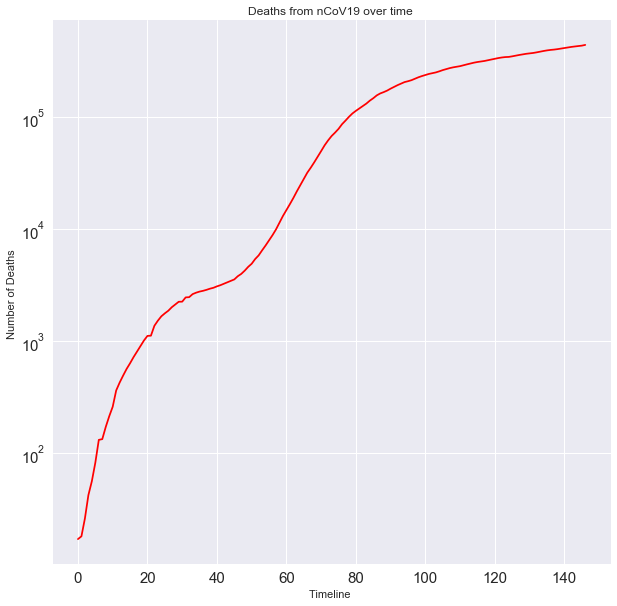

In [191]:
# Total Deaths 
plt.figure(figsize=(10,10))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('Deaths from nCoV19 over time ')
plt.xlabel('Timeline ')
plt.ylabel('Number of Deaths ')
plt.xticks(size=15)
plt.yticks(size=15)
plt.yscale('log')
plt.savefig('Deaths from nCoV19(Log Scale).png')
plt.show()

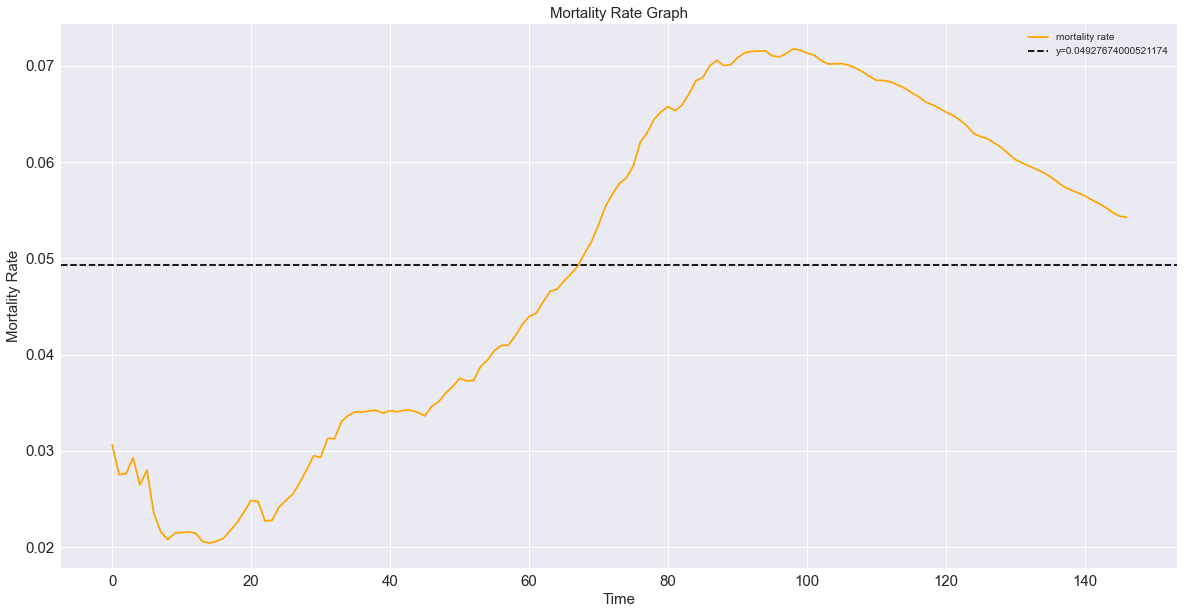

In [195]:
# Mortality Rate = Total Deaths/ Total Confirmed cases
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20,10))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y=mean_mortality_rate, linestyle='--', color='black')
plt.title('Mortality Rate Graph', size=15)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)])
plt.xlabel('Time', size=15)
plt.ylabel('Mortality Rate', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.savefig('Mean mortality rate.png')
plt.show()

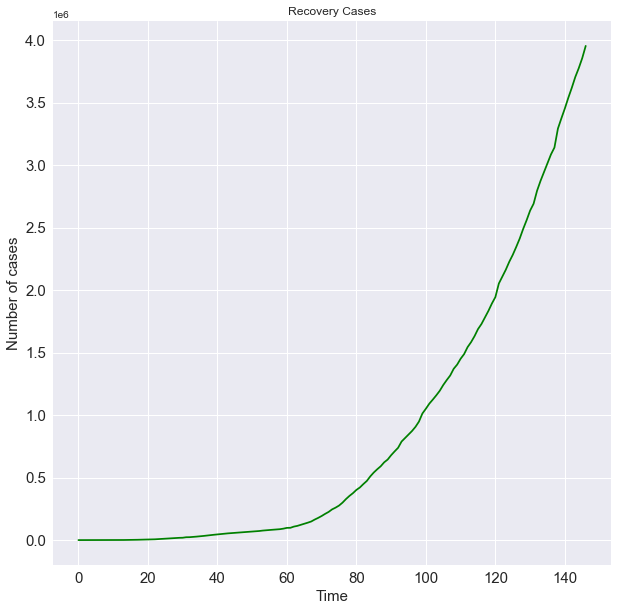

In [197]:
# Recovery graph
plt.figure(figsize=(10,10))
plt.plot(adjusted_dates, total_recovered, color='green')
plt.title('Recovery Cases')
plt.xlabel('Time', size=15)
plt.ylabel('Number of cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.savefig('Recovery Graph.png')
plt.show()

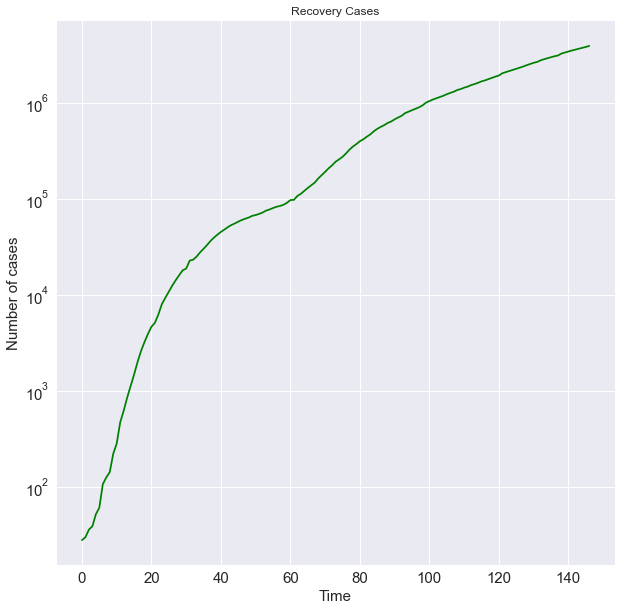

In [198]:
plt.figure(figsize=(10,10))
plt.plot(adjusted_dates, total_recovered, color='green')
plt.title('Recovery Cases')
plt.xlabel('Time', size=15)
plt.ylabel('Number of cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.yscale('log')
plt.savefig('(Log Scale) Recovery Graph.png')
plt.show()

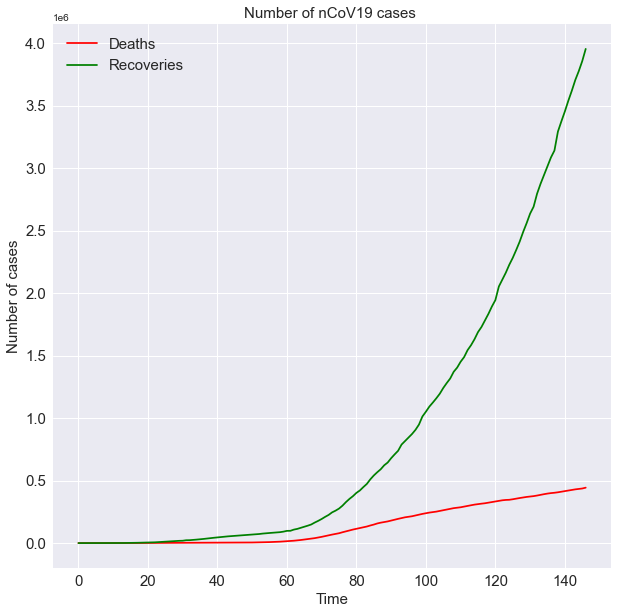

In [201]:
# nCoV-19 recovery vs deaths
plt.figure(figsize=(10,10))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['Deaths', 'Recoveries'], loc='best', fontsize=15)
plt.title('Number of nCoV19 cases ', size=15)
plt.xlabel('Time', size=15)
plt.ylabel('Number of cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.savefig('Deaths and Recovery.png')
plt.show()

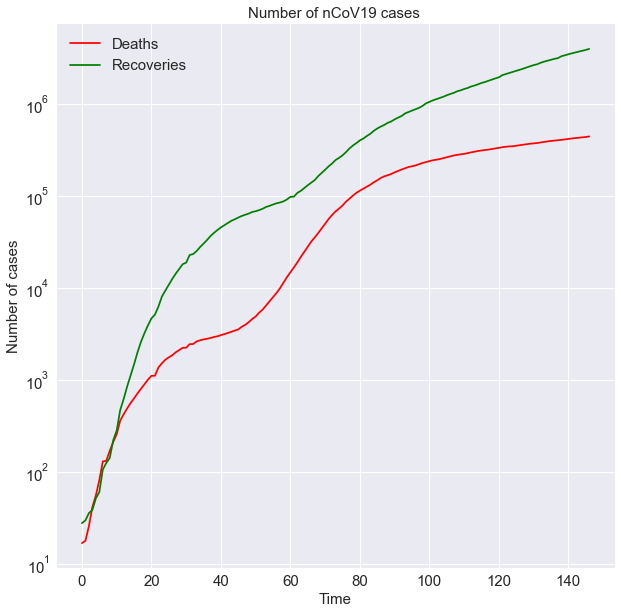

In [202]:
plt.figure(figsize=(10,10))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['Deaths', 'Recoveries'], loc='best', fontsize=15)
plt.title('Number of nCoV19 cases ', size=15)
plt.xlabel('Time', size=15)
plt.ylabel('Number of cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.yscale('log')
plt.savefig('(Log Scale) Deaths and Recovery.png')
plt.show()

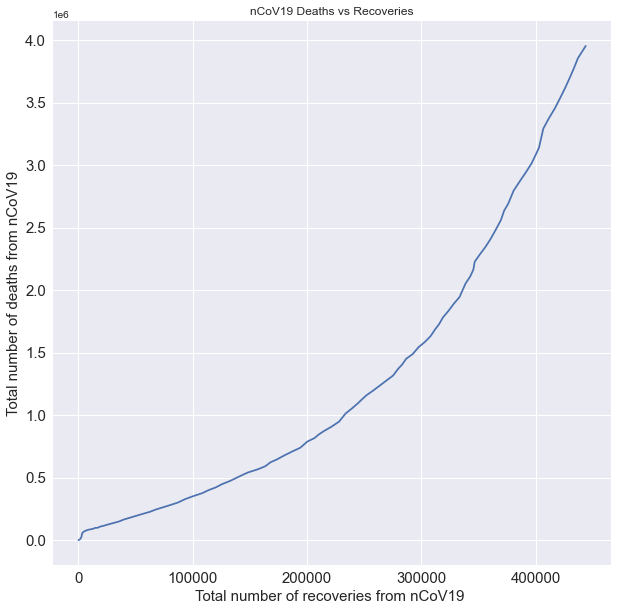

In [10]:
# Death vs Recovery plot
plt.figure(figsize=(10,10))
plt.plot(total_deaths, total_recovered)
plt.title('nCoV19 Deaths vs Recoveries')
plt.xlabel('Total number of recoveries from nCoV19 ', size=15)
plt.ylabel('Total number of deaths from nCoV19', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
# plt.savefig('nCoV19 Deaths vs Recovery.png')
plt.show()

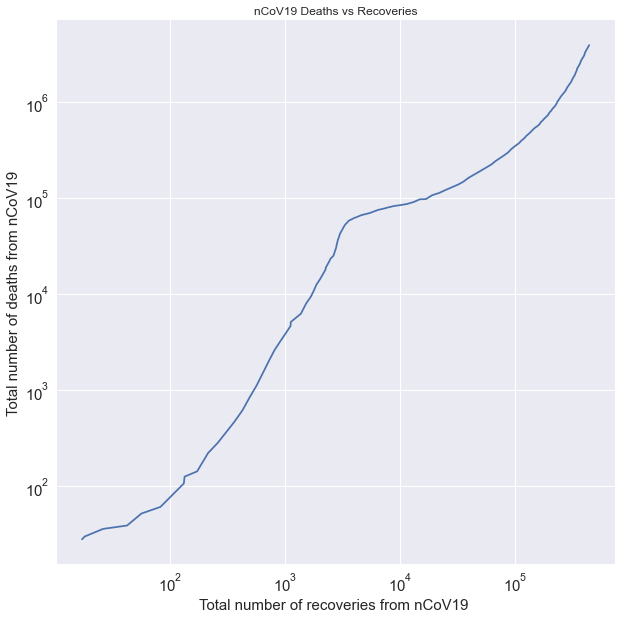

In [11]:
plt.figure(figsize=(10,10))
plt.plot(total_deaths, total_recovered)
plt.title('nCoV19 Deaths vs Recoveries')
plt.xlabel('Total number of recoveries from nCoV19 ', size=15)
plt.ylabel('Total number of deaths from nCoV19', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.yscale('log')
plt.xscale('log')
# plt.savefig('(Logrithmic Scale) nCoV19 Deaths vs Recovery.png')
plt.show()

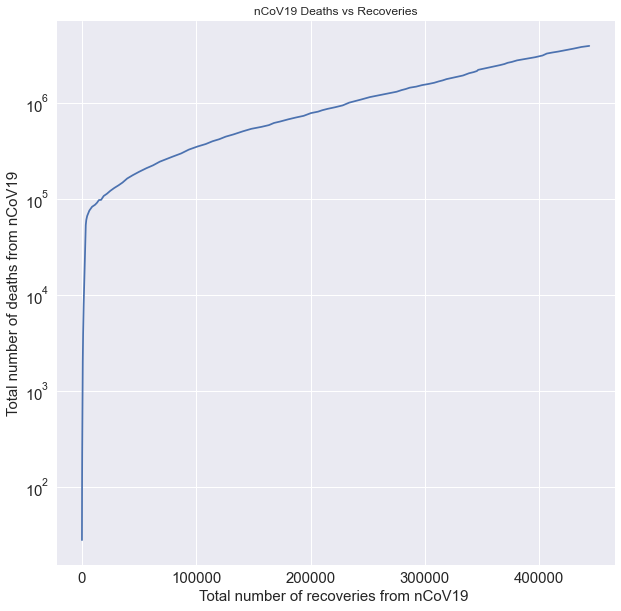

In [12]:
plt.figure(figsize=(10,10))
plt.plot(total_deaths, total_recovered)
plt.title('nCoV19 Deaths vs Recoveries')
plt.xlabel('Total number of recoveries from nCoV19 ', size=15)
plt.ylabel('Total number of deaths from nCoV19', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.yscale('log')
# plt.savefig('(Logrithmic Scale) nCoV19 Deaths vs Recovery.png')
plt.show()